<a href="https://colab.research.google.com/github/chumjikim/CentralizedTest/blob/master/2%EC%B0%A8_%EC%8B%A4%EC%8A%B5_%EC%BD%94%EB%93%9C(Pytorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Data loading

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
data = cancer.data
labels = cancer.target

print(data)
print(labels)
print(data.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [0]:
# Split data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.1) 
print(len(x_train), len(x_test), type(x_train))

print(x_test)
print(y_test)

512 57 <class 'numpy.ndarray'>
[[1.289e+01 1.411e+01 8.495e+01 ... 1.561e-01 2.639e-01 1.178e-01]
 [1.981e+01 2.215e+01 1.300e+02 ... 2.388e-01 2.768e-01 7.615e-02]
 [1.236e+01 2.180e+01 7.978e+01 ... 1.205e-01 2.972e-01 9.261e-02]
 ...
 [9.904e+00 1.806e+01 6.460e+01 ... 9.910e-02 2.614e-01 1.162e-01]
 [9.777e+00 1.699e+01 6.250e+01 ... 5.334e-02 2.533e-01 8.468e-02]
 [9.465e+00 2.101e+01 6.011e+01 ... 6.517e-02 2.878e-01 9.211e-02]]
[1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1]


In [0]:
# Convert to tensor

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable


x_train = Variable(torch.from_numpy(x_train).float())
y_train = Variable(torch.from_numpy(y_train).float())

x_test = Variable(torch.from_numpy(x_test).float())
y_test = Variable(torch.from_numpy(y_test).float())

print(type(x_train))

<class 'torch.Tensor'>


In [0]:
# Generating dataset

train_set = TensorDataset(x_train, y_train)
test_set = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_set, batch_size = 8, shuffle=True)

In [0]:
# Construct model

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.layer1 = nn.Linear(30, 128)
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64, 32)
    self.layer4 = nn.Linear(32, 16)
    self.layer5 = nn.Linear(16, 1)
    self.act = nn.ReLU()

  def forward(self,x):
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))
    x = self.act(self.layer4(x))
    x = self.layer5(x)
    x = torch.sigmoid(x)
    
    return x

model = Model()
print(model)


Model(
  (layer1): Linear(in_features=30, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=16, bias=True)
  (layer5): Linear(in_features=16, out_features=1, bias=True)
  (act): ReLU()
)


In [0]:
# Configure optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [0]:
# Training

epochs = 200
losses = list()
accuracies = list()

for epoch in range(epochs):
  epoch_loss = 0  
  epoch_accuracy = 0
  for x, y in train_loader:
  
    optimizer.zero_grad()

    output = model(x)

    loss = F.binary_cross_entropy(output, y)
    loss.backward()
    
    optimizer.step()
    
    output[output>=0.5] = 1
    output[output<0.5] = 0
    accuracy = sum(sum(y.data.numpy() == output.data.T.numpy()))

    epoch_loss += loss.item()
    epoch_accuracy += accuracy
  

  epoch_loss /= len(train_loader)
  epoch_accuracy /= len(x_train)
  print(str(epoch+1).zfill(3), "loss :", round(epoch_loss,4),"accuracy :", round(epoch_accuracy,4))
  
  losses.append(epoch_loss)
  accuracies.append(epoch_accuracy)

  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  


001 loss : 0.6483 accuracy : 0.5879
002 loss : 0.5943 accuracy : 0.6934
003 loss : 0.5151 accuracy : 0.7949
004 loss : 0.498 accuracy : 0.8066
005 loss : 0.4637 accuracy : 0.8262
006 loss : 0.4182 accuracy : 0.8535
007 loss : 0.4341 accuracy : 0.8203
008 loss : 0.4617 accuracy : 0.7715
009 loss : 0.4001 accuracy : 0.8535
010 loss : 0.3956 accuracy : 0.8594
011 loss : 0.3526 accuracy : 0.8633
012 loss : 0.3588 accuracy : 0.8613
013 loss : 0.3289 accuracy : 0.877
014 loss : 0.3492 accuracy : 0.8672
015 loss : 0.3283 accuracy : 0.8711
016 loss : 0.322 accuracy : 0.8867
017 loss : 0.3032 accuracy : 0.8906
018 loss : 0.3296 accuracy : 0.8867
019 loss : 0.3265 accuracy : 0.8906
020 loss : 0.3146 accuracy : 0.8672
021 loss : 0.2865 accuracy : 0.8906
022 loss : 0.3061 accuracy : 0.8887
023 loss : 0.3002 accuracy : 0.877
024 loss : 0.3204 accuracy : 0.8652
025 loss : 0.2894 accuracy : 0.8926
026 loss : 0.2834 accuracy : 0.8691
027 loss : 0.2705 accuracy : 0.9082
028 loss : 0.2865 accuracy : 0.8

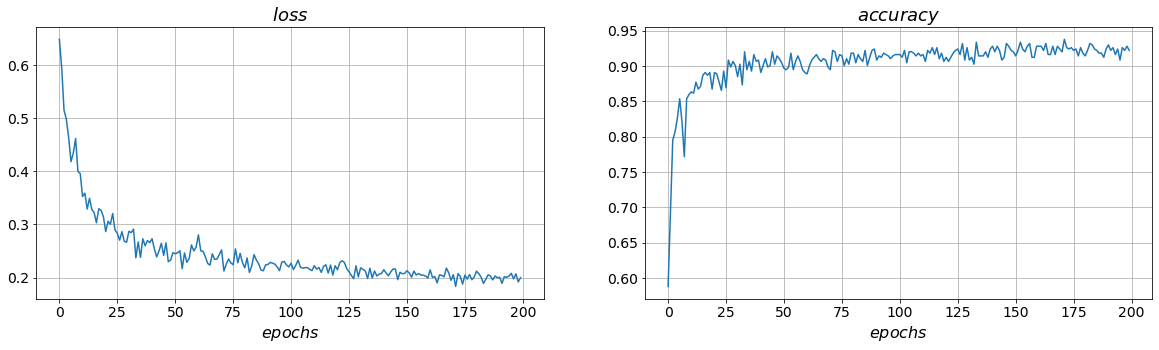

In [0]:
# Plot result

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.2)

plt.subplot(1,2,1)
plt.title("$loss$",fontsize = 18)
plt.plot(losses)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.subplot(1,2,2)
plt.title("$accuracy$", fontsize = 18)
plt.plot(accuracies)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [0]:
# Test

output = model(x_test)
output[output>=0.5] = 1
output[output<0.5] = 0

accuracy = sum(sum(y_test.data.numpy() == output.data.T.numpy())) /len(y_test)

print("test_set accuracy :", round(accuracy,4))

test_set accuracy : 0.9123
